## Workflow 

```mermaid
graph LR
    START --> LLM --> END
    LLM -->|Query| LLM
    LLM -->|Response (State)| END

In [ ]:
# we'll use llama3.2 from ChatOllama from langchain 
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model='llama3.2',
    verbose=True,
    temperature=0.2
)

llm.invoke("How are you?")

AIMessage(content="I'm just a language model, so I don't have feelings or emotions like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?", additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2026-01-05T17:50:12.539324Z', 'done': True, 'done_reason': 'stop', 'total_duration': 19125254541, 'load_duration': 1630299083, 'prompt_eval_count': 29, 'prompt_eval_duration': 14077412250, 'eval_count': 47, 'eval_duration': 3412910459, 'logprobs': None, 'model_name': 'llama3.2', 'model_provider': 'ollama'}, id='lc_run--019b8f47-9b5b-7191-8569-a79ec9daf5cd-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 29, 'output_tokens': 47, 'total_tokens': 76})

In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

class LLMState(TypedDict):
    query: str 
    response: str

In [12]:
from langchain_core.prompts import PromptTemplate

def llm_function(state: LLMState) -> LLMState:
    query = state['query']
    template = """ 
        Given the user query : {query}, answer it in polite way.
    """
    prompt = PromptTemplate(
        template=template,
        input_variables = ['query']
    )

    chain = prompt | llm
    response = chain.invoke({'query' : query})
    state['response'] = response.content 
    return state

In [13]:
# define graph 
graph = StateGraph(LLMState)

# add nodes 
graph.add_node('llm', llm_function)

# add edges 
graph.add_edge(START, 'llm')
graph.add_edge('llm', END)

# compile graph 
simple_workflow = graph.compile()

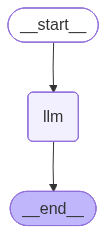

In [14]:
# display the graph 
from IPython.display import Image 
Image(simple_workflow.get_graph().draw_mermaid_png())

In [15]:
# invoke the graph 
query = "Hey How are you?"
output_state = simple_workflow.invoke({'query': query})
print(output_state)

{'query': 'Hey How are you?', 'response': "I'm doing well, thank you for asking! It's great to chat with you. How can I assist you today?"}
